In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os   # required for parsing thru directories, file etc

In [2]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\lenovo\anaconda3\lib\site-packages (20.2.4)
Note: you may need to restart the kernel to use updated packages.


In [3]:
! pip install opencv-contrib-python-headless --user

In [4]:
import cv2

In [5]:
cv2.__version__

'4.4.0'

In [6]:
DATA_DIR = "H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages"
CATEGORIES = ["Dog", "Cat"] #Index 0 is dog and 1 is cat 

In [7]:
img_file = DATA_DIR + '\\Dog\\66.jpg'
img_file

'H:\\Professional Certification\\Deep Learning-Udemy-October 2020\\PetImages\\Dog\\66.jpg'

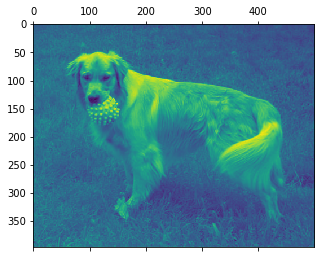

In [8]:
image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
plt.matshow(image)

In [9]:
print(image) #data of image grayscale

[[103 113 120 ...  92  95  97]
 [104 112 117 ...  94  95  96]
 [104 109 112 ...  94  93  92]
 ...
 [127 125 120 ... 110 111 111]
 [117 118 111 ... 112 112 112]
 [142 143 117 ... 114 113 113]]


In [10]:
#print shape of the image
print(image.shape)

(397, 500)


In [11]:
#normalize the image size to say 50 x 50
#as images are of different sizes
IMG_SIZE = 50
new_ar = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

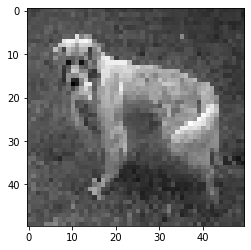

In [12]:
plt.imshow(new_ar, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [14]:
#this takes time say 5 mins ...as the image are large is number
create_training_data()

In [15]:
len(training_data) #training data --> new array (image data) , labels

24946

In [16]:
#shuffle data as its all dogs and then all dogs
#use random

import random

In [17]:
random.shuffle(training_data)

In [18]:
#print the label: 0 as dog and 1 as a cat

#sample[0] --> actual image data
#sample[1] --> label (i.e 0 or 1 --> Dog, Cat)

for sample in training_data[0:10]:
    print(sample[1])


1
1
1
1
0
0
0
1
1
1


In [19]:
#from feature array and label arrays
#the image data is 2D array, so make it 1D numpy array

X = [] #X is features
y = [] #y is label


In [20]:
for features, label in training_data:   #training_data --> new_array(image data), labels
    X.append(features)
    y.append(label)
    

In [21]:
#convert to numpy array
X = np.array(X)
print(X[0:5])

[[[114 113 116 ...  55  72  69]
  [102 106 108 ...  47  76  79]
  [116 121 122 ...  39  75  80]
  ...
  [ 19   8  15 ...  11  37   3]
  [ 18  18  10 ...  13  44   1]
  [ 16  22  18 ...  15  44   1]]

 [[162 159 163 ... 173 152 156]
  [154 163 156 ... 158 165 160]
  [145 156 166 ... 166 169 157]
  ...
  [141 147 135 ...  11  31  30]
  [144 146 131 ...   9  27  29]
  [154 146 133 ...   9  25  28]]

 [[ 84 107  70 ... 251 245 234]
  [ 68  70  82 ... 252 246 236]
  [ 82  23  62 ... 252 247 236]
  ...
  [154 147 139 ...  48  45  48]
  [155 143 150 ...  45  45  44]
  [153 145 151 ...  11   4  11]]

 [[242 245 230 ... 193 201 191]
  [244 245 245 ... 199 193 197]
  [237 246 239 ... 194 185 196]
  ...
  [207 187 193 ... 146 182 179]
  [197 200 198 ... 181 179 175]
  [193 196 195 ... 186 187 182]]

 [[  1   1   5 ... 185 190 194]
  [  1  10  49 ... 187 191 138]
  [  6  15   8 ... 167  77  73]
  ...
  [ 29  31  30 ...  73  81  61]
  [ 31  30  32 ...  74  74  73]
  [ 31  29  29 ...  72  70  70]]]


In [22]:
#reshape for any size (i.e any features), 1D array
# -1 for all features (i.e all size)
# 1 --> grayscale image

X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[0:5])

[[[[114]
   [113]
   [116]
   ...
   [ 55]
   [ 72]
   [ 69]]

  [[102]
   [106]
   [108]
   ...
   [ 47]
   [ 76]
   [ 79]]

  [[116]
   [121]
   [122]
   ...
   [ 39]
   [ 75]
   [ 80]]

  ...

  [[ 19]
   [  8]
   [ 15]
   ...
   [ 11]
   [ 37]
   [  3]]

  [[ 18]
   [ 18]
   [ 10]
   ...
   [ 13]
   [ 44]
   [  1]]

  [[ 16]
   [ 22]
   [ 18]
   ...
   [ 15]
   [ 44]
   [  1]]]


 [[[162]
   [159]
   [163]
   ...
   [173]
   [152]
   [156]]

  [[154]
   [163]
   [156]
   ...
   [158]
   [165]
   [160]]

  [[145]
   [156]
   [166]
   ...
   [166]
   [169]
   [157]]

  ...

  [[141]
   [147]
   [135]
   ...
   [ 11]
   [ 31]
   [ 30]]

  [[144]
   [146]
   [131]
   ...
   [  9]
   [ 27]
   [ 29]]

  [[154]
   [146]
   [133]
   ...
   [  9]
   [ 25]
   [ 28]]]


 [[[ 84]
   [107]
   [ 70]
   ...
   [251]
   [245]
   [234]]

  [[ 68]
   [ 70]
   [ 82]
   ...
   [252]
   [246]
   [236]]

  [[ 82]
   [ 23]
   [ 62]
   ...
   [252]
   [247]
   [236]]

  ...

  [[154]
   [147]
   [139]
   

**Saving Model & Retrieving mode**

Saving of modal using Pickle is optional. It is done to do processing in later point is time

In [23]:
#save the model
#use pickle to save the model

import pickle

In [24]:
#save X (i.e features)

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [25]:
#save y (i.e labels)

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close

<function BufferedWriter.close>

**Retrieve model using load**

In [29]:
import pickle
#load features in X
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [30]:
#load labels in y
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

**Perform Convolutional Neural Network (CNN) processing**

In [31]:
#import tensorflow.keras various layers
#import tensorflow as tf

import keras

Using TensorFlow backend.


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [33]:
#Normalize the image data, divide each by pixel by 255
X = X / 255.0

In [34]:
X.shape #24596 images of 50 x 50 size, 1 --> Y values (of YCbCr/YUV format)

(24946, 50, 50, 1)

In [35]:
X.shape[1:]

(50, 50, 1)

In [42]:
model = Sequential()

#group layer 1
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))

model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2,2)))

In [43]:
#group layer 2
model.add(Conv2D(64, (3,3)))

model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size = (2,2)))

In [44]:
#group layer 3, flatten and add dense layer
model.add(Flatten())
model.add(Dense(64))

#from output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [46]:
#compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)             

In [48]:
#do fitment 
#batch size --> 32, so perform 32 samples at a time
#model.fit(X, y, batch_size = 32, epochs = 3, validation_split = 1)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
#do fitment 
#batch size --> 32, so perform 32 samples at a time
model.fit(X, y, batch_size = 32, epochs = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
24946/24946 [==============================] - 204s 8ms/step - loss: 0.6250 - accuracy: 0.6446


In [51]:
yp = model.predict(X_test)

In [52]:
yp[0]

array([0.22851735], dtype=float32)

In [53]:
yp[0].shape

(1,)

In [54]:
y_test[0]

1

In [55]:
model.evaluate(X_test, y_test)

4990/4990 [==============================] - 12s 2ms/step


[0.5514520542655058, 0.7204408645629883]